Student: Duncan Ferguson <br>
Student Id: 871641260 <br>
Class: Comp 4431-1 <br>
Assignment: Exercise 9 <br>
Date: 11/5/2021 <br>
Group: Name: Broken Toe <br>
Group Members: Emma Bright, Mike Santoro <br>



Starting kmeans

kmeans.labels_ :
[1 0 0 0 0 0 0 0 1 0 0 0 1 1 2 0 2 2 0 2 0 2 2 0 2 0 1 0 0 2 2 0 1 1 0 0 2
 0 0 2 2 0 1 0 2 2 1 1 0 2 0 1 0 2 0 0 1 0 0 1 0 0 0 0 0 2 1 2 0 0 0 2 2 2
 0 0 0 0 0 2 0 1 0 1 0 1 2 1 2 0 0 1 0 0 1 1 1 1 0 2 0 0 0 0 0 0 2 2 0 0 2
 0 0 0 1 0 0 2 2 2 1 0 0 0 1 1 0 0 1 0 1 0 1 2 0 2 2 2 0 0 0 2 2 2 0 2 1 0
 2 1 2 2 0 0 1 2 0 1 0 0 0 0 1 0 0 1 0 2 0 2 1 0 0 1 1 2 0 0 2 1 0 0 1 0 1
 0 0 1 0 2 1 0 1 0 0 0 0 0 1 0 0 0 2 2 0 2 0 1 0 1 0 1 2 2 2 2 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 2 2 0 2 2 0 0 0 0 2 0 0 2 0 1 2 0 0 1 1 0 2 1 0 0 1 0 1 0
 2 0 2 2 0 2 0 0 1 2 1 1 0 0 0 0 0 0 0 1 1 1 2 0 2 0 2 0 1 1 2 1 2 0 0 0 0
 0 0 0 1 0 0 0 1 0 2 0 2 0 0 0 1 1 1 0 0 0 1 0 2 1 0 0 2 0 0 0 0 1 2 0 0 0
 2 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 2 1 1 0 1 2 0 1 0 0 0 2 0 1 0 0 1 1 1
 0 1 0 0 0 1 2 1 2 0 1 0 0 1 2 2 0 1 0 1 2 0 2 0 0 1 2 1 1 2 0 1 0 1 2 0 2
 1 0 1 0 0 0 1 0 0 2 2 0 0 1 0 1 2 2 2 0 2 2 0 0 0 1 0 0 2 0 2 0 0 0 1 0 1
 0 1 1 1 0 1 1 1 2 0 2 2 0 2 1 0 2 2 0 0 0 2 1 1 0 0 1 0 2 0 1 2

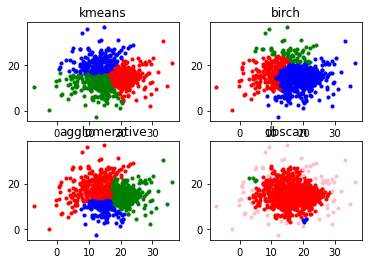

<Figure size 504x360 with 0 Axes>

'\nWhat To upload:\n\nA pdf file containg a writeup describing one or two data sets, the 4-char visualization that shows\nthe results in different clustering, and an explanation of WHY the different clustering algorithms behave\nas they do'

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.naive_bayes import *
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

# Visualize the clustering
# borrowed from https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html#sphx-glr-auto-examples-cluster-plot-digits-linkage-py

def plot_clustering(theData, kmeanLabels, brcLabels, aggLabels, dbLabels ):
	fig,ax = plt.subplots(2, 2)

	for i in range(len(theData)):
		if kmeanLabels[i] == 0: theColor = 'red'
		if kmeanLabels[i] == 1: theColor = 'green'
		if kmeanLabels[i] == 2: theColor = 'blue'
		ax[0,0].scatter(theData[i][0], theData[i][1], s=9.5, alpha=1.0, color=theColor)
		ax[0,0].set_title('kmeans')

	for i in range(len(theData)):
		if brcLabels[i] == 0: theColor = 'blue'
		if brcLabels[i] == 1: theColor = 'red'
		if brcLabels[i] == 2: theColor = 'green'
		ax[0,1].scatter(theData[i][0], theData[i][1], s=9.5, alpha=1.0, color=theColor)
		ax[0,1].set_title('birch')

	for i in range(len(theData)):
		if aggLabels[i] == 0: theColor = 'red'
		if aggLabels[i] == 1: theColor = 'green'
		if aggLabels[i] == 2: theColor = 'blue'
		ax[1,0].scatter(theData[i][0], theData[i][1], s=9.5, alpha=1.0, color=theColor)
		ax[1,0].set_title('agglomerative')


	for i in range(len(theData)):
		if dbLabels[i] == 0: theColor = 'red'
		elif dbLabels[i] == 1: theColor = 'green'
		elif dbLabels[i] == 2: theColor = 'blue'
		else: theColor = 'pink'
		ax[1,1].scatter(theData[i][0], theData[i][1], s=9.5, alpha=1.0, color=theColor)
		ax[1,1].set_title('dbscan')


	plt.figure(figsize=(7, 5))
	plt.show()



numClusters = 3

df = pd.read_csv('outfile_Square.csv')
theData = df.to_numpy()

########## kmeans
print("\n\nStarting kmeans")
kmeans = KMeans(n_clusters=numClusters, random_state=0).fit(df)
print("\nkmeans.labels_ :")
print(kmeans.labels_)

# the following shows using the clusters to predict new point cluster locations
'''
print('means for the three clusters are:')
print(kmeans.cluster_centers_)
print('Using the clustering model to predict clusters now.')
print('kmeans.predict( [ [8,8], [19,19], [31,31]] ) returns: ')
print(kmeans.predict( [ [8,8], [19,19], [31,31]] ) )
'''

# the following shows using predict to divide data into clusters
# NOTE - a faster/better way is to just use the kmeans.labels_ array
'''
clusteredData = dict()
for i in range(numClusters):
	clusteredData[i] = list()
for i in theData:
	clusterNum = kmeans.predict( [ i ] )[0]
	clusteredData[clusterNum].append( i)
print("length of clusters:")
print(len(clusteredData[0]))
print(len(clusteredData[1]))
print(len(clusteredData[2]))
'''


########## birch
print("\n\nStarting Birch")
brc = Birch(n_clusters=numClusters).fit(df)
print("\nbrc.labels_ : ")
print(brc.labels_)

print('Using the birch model to predict clusters now.')
print('brc.predict( [ [8,8], [19,19], [31,31]] ) returns: ')
print(brc.predict( [ [8,8], [19,19], [31,31]] ) )
clusteredData = dict()
for i in range(numClusters):
	clusteredData[i] = list()
for i in theData:
	clusterNum = brc.predict( [ i ] )[0]
	clusteredData[clusterNum].append( i)
print("length of clusters:")
print(len(clusteredData[0]))
print(len(clusteredData[1]))
print(len(clusteredData[2]))


########## Agglomerative
print("\n\nStarting Agglomerative ")
agg = AgglomerativeClustering(n_clusters=numClusters,linkage='ward').fit(df)
print("\nagg.labels_ :")
print(agg.labels_)


########## DBSCAN
print("\n\nStarting DBSCAN ")
db = DBSCAN(eps=1.5, min_samples=4).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
print("\ndb.labels_ :")
print(db.labels_)

#Testing

###### compare them
theData = df.to_numpy()
plot_clustering(theData, kmeans.labels_ , brc.labels_, agg.labels_, db.labels_)

"""
What To upload:

A pdf file containg a writeup describing one or two data sets, the 4-char visualization that shows
the results in different clustering, and an explanation of WHY the different clustering algorithms behave
as they do"""

